# Laboratory #04 : Corner detection and ORB

At the end of this laboratory, you would get familiarized with

*   Corner Detection using FAST and Harris Corners
*   ORB feature detectors and descriptors

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Use will have to mount your drive to access the images.

---

In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import color, data, feature, filters, io, transform
from pathlib import Path
import utils as u

# Corner Detection

**Exercise: #1**

*    Detect the corners in the image starbucks4.jpg. Use corner_fast to extract FAST corners for the given image and corner_peaks to find corners in the corner measure response image.
*   Show the original image, fast corners, peaks overlayed on the original image using matplotlib subplot.



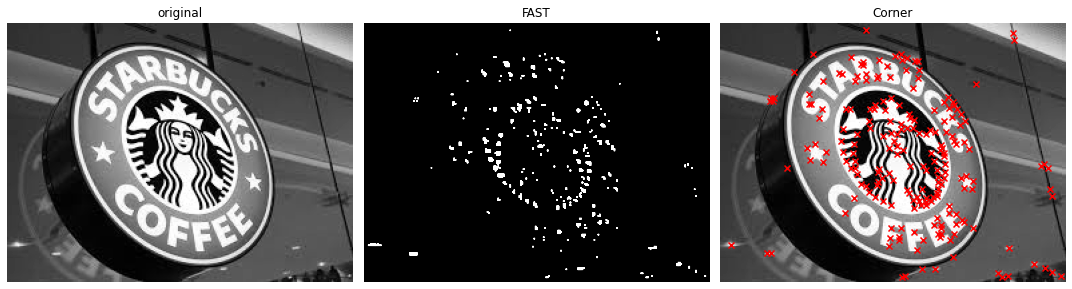

In [2]:
# solution
starBucks4Image = u.loadGrayFloatImage('images/starbucks/starbucks4.jpg')
starBucks4Fast = feature.corner_fast(starBucks4Image)
starBucks4Peaks = feature.corner_peaks(starBucks4Fast)
images = {
    "original": starBucks4Image,
    "FAST": starBucks4Fast,
    "Corner": starBucks4Image
}
f, ax = u.plotImages(images, cmap='gray', vmax=1, vmin=0)
ax[2].scatter(starBucks4Peaks[:,1], starBucks4Peaks[:,0], c='red', marker='x')
plt.tight_layout()
plt.show()

*   Analyze and discuss the effect of different values of the parameter threshold in the corner_fast function.

**Solution**

The threshold is the value used in deciding whether the pixels on the circle are brighter, darker or similar with relation to the test pixel. Decreasing the threshold will yield more corners and vice-versa.

*   Repeat the experiment by replacing FAST corners with Harris corners.

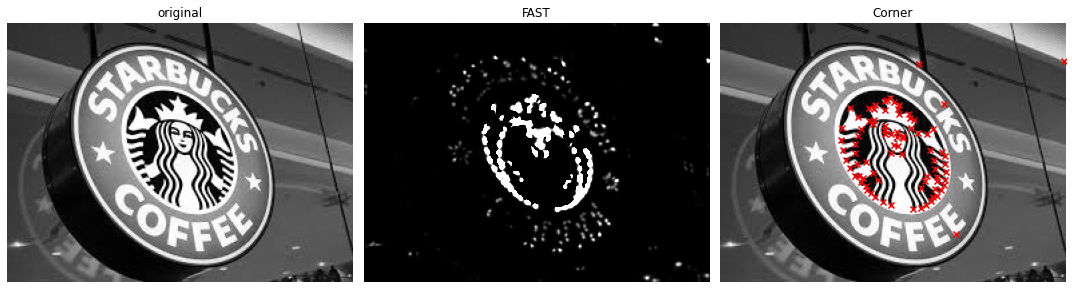

In [3]:
# solution
starBucks4Image = u.loadGrayFloatImage('images/starbucks/starbucks4.jpg')
starBucks4Harris = feature.corner_harris(starBucks4Image)
starBucks4HarrisPeaks = feature.corner_peaks(starBucks4Harris)
images = {
    "original": starBucks4Image,
    "FAST": starBucks4Harris,
    "Corner": starBucks4Image
}
f, ax = u.plotImages(images, cmap='gray', vmax=1, vmin=0)
ax[2].scatter(starBucks4HarrisPeaks[:,1], starBucks4HarrisPeaks[:,0], c='red', marker='x')
plt.tight_layout()
plt.show()


*   Do you find difference between both the techniques? If so, why and what difference do you observe?

**Solution**

Yes, there is a difference. Harris is detecting brighter corners, mostly localized in the center of the iluminated logo in our case. Meanwhile, FAST computes the corners more localized, resulting in more corners detected.

# ORB feature detector and binary descriptor

**Exercise #0: Compute ORB descriptors and find descriptors match**

*   Load 'astronaut' image from data module.
*   Convert the image to grayscale.
*   Create a copy of the image and rotate it by 180&deg; 



In [4]:
img1 = color.rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)

*   Create an ORB feature detector with default parameters. *Hint: ORB feature detector is available in skimage.feature module.*



In [5]:
descriptor_extractor = feature.ORB(n_keypoints=200)

*   Use detect_and_extract function to detect features and extract descriptors.
*   Extract keypoints using descriptor_extractor.keypoints
*   Extract descriptors using descriptor_extractor.descriptors

In [6]:
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

*   Descriptors can be matched using match_descriptors function available in skimage.feature module
*   The matches can be plotted using the plot_matches function available in skimage.feature module

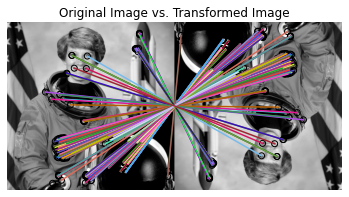

In [7]:
matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
feature.plot_matches(plt, img1, img2, keypoints1, keypoints2, matches12)
plt.axis('off')
plt.title("Original Image vs. Transformed Image")
plt.show()

**Exercise: #1**

*   Analyze and discuss the effect of different values of the parameter max_ratio in the match_descriptors function.

**Solution**

max_ratio is the maximum ratio of distances between first and second closest descriptor in the second set of descriptors. This threshold is useful to filter ambiguous matches between the two descriptor sets.

*   What do you infer from harris_k, n_scales, fast_n, fast_threshold parameters in ORB function?

**Solution**

*(Double-click or enter to edit)*

...

**Exercise: #2**
*   Using the above example, create a function get_ORB, that takes two images as parameters and returns the keypoints of both images and descriptor matches

In [8]:
# solution
def get_ORB(image1, image2, n_keypoints=200, **kwargs):
    descriptor_extractor = feature.ORB(n_keypoints=200, **kwargs)

    descriptor_extractor.detect_and_extract(image1)
    keypoints1, descriptors1 = descriptor_extractor.keypoints, descriptor_extractor.descriptors

    descriptor_extractor.detect_and_extract(image2)
    keypoints2, descriptors2 = descriptor_extractor.keypoints, descriptor_extractor.descriptors

    matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
    return keypoints1, keypoints2, matches12

*   With the function, detect the correspondences between the model image starbucks.jpg with the scene image starbucks4.jpg
*   Plot the matches between the two images.

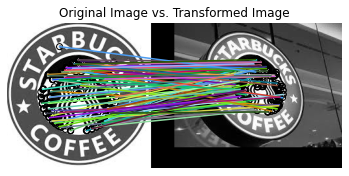

In [9]:
# solution
starBucksImage = u.loadGrayFloatImage('images/starbucks/starbucks.jpg')
starBucks4Image = u.loadGrayFloatImage('images/starbucks/starbucks4.jpg')
keypoints1, keypoints2, matches12 = get_ORB(starBucksImage, starBucks4Image)
feature.plot_matches(plt, starBucksImage, starBucks4Image, keypoints1, keypoints2, matches12)
plt.axis('off')
plt.title("Original Image vs. Transformed Image")
plt.show()

**Exercise: #3**

*   Using "starbucks.jpg" image as a model, show its matches to all Starbucks images. 
*   Show the number of the matches for the pair as title for each plot.

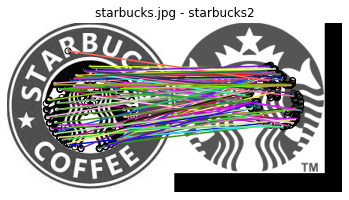

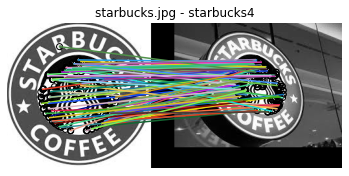

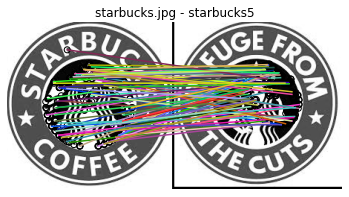

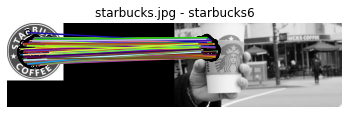

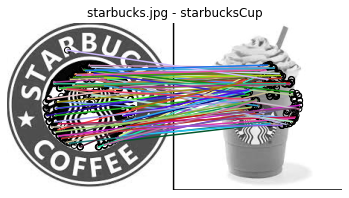

In [20]:
# solution
StarbucksImages = [
    "images/starbucks/starbucks2.png",
    "images/starbucks/starbucks4.jpg",
    "images/starbucks/starbucks5.png",
    "images/starbucks/starbucks6.jpg",
    "images/starbucks/starbucksCup.jpg"
]
modelImage = u.loadGrayFloatImage('images/starbucks/starbucks.jpg')
for imagePath in StarbucksImages:
    otherImage = u.loadGrayFloatImage(imagePath)
    keypoints1, keypoints2, matches12 = get_ORB(starBucksImage, starBucks4Image)
    feature.plot_matches(plt, modelImage, otherImage, keypoints1, keypoints2, matches12)
    plt.axis('off')
    plt.title(f"starbucks.jpg - {Path(imagePath).stem}")
    plt.show()

*   Comment on the performance of the algorithm with respect to each image. When do you think the algorithm works better?

**Solution**

*(Double-click or enter to edit)*

...

**Exercise: #4**

*   Repeate the experiment, by changing the orientation of the model image by rotating it and comparing it with its original version.
*   Create 8 orientations of the model image by rotating the image by 45&deg; (0, 45, 90, 135, 180, 225, 270, 315). *Hint: You can use the rotate() function from skimage.transform.*

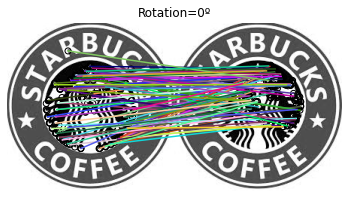

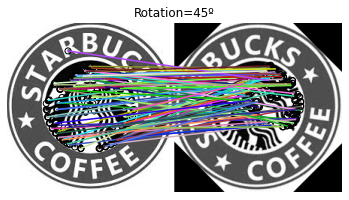

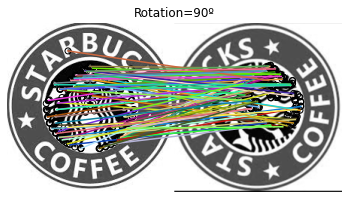

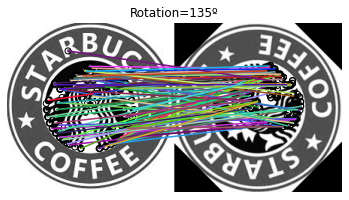

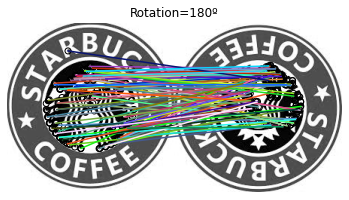

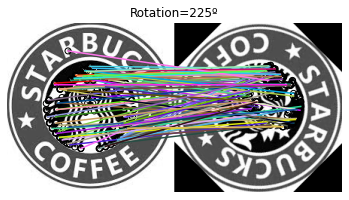

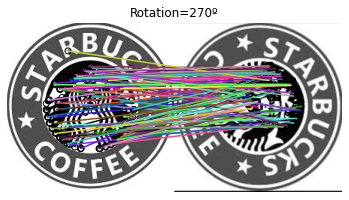

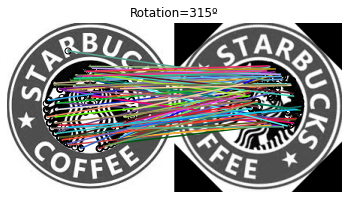

In [22]:
# solution
Rotations = (0, 45, 90, 135, 180, 225, 270, 315)
modelImage = u.loadGrayFloatImage('images/starbucks/starbucks.jpg')
for rotation in Rotations:
    otherImage = transform.rotate(modelImage, rotation)
    keypoints1, keypoints2, matches12 = get_ORB(starBucksImage, starBucks4Image)
    feature.plot_matches(plt, modelImage, otherImage, keypoints1, keypoints2, matches12)
    plt.axis('off')
    plt.title(f"Rotation={rotation}º")
    plt.show()


**Exercise: #5**

*   Repeat the experiment using Coco-cola images using cocacola_logo.png as the model image.
*   Does the same parameters used for Starbucks images work in this case? Or was it necessary to modify the ORB parameters?

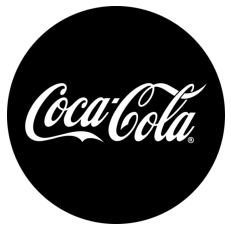

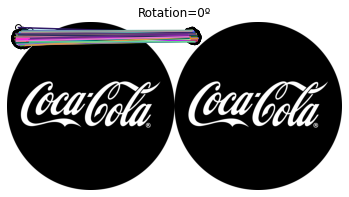

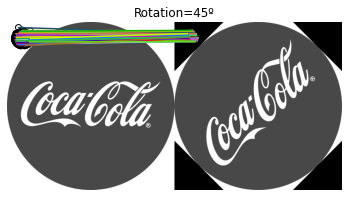

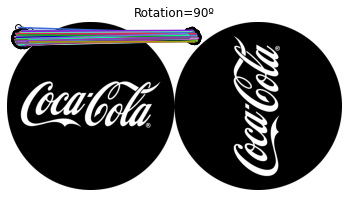

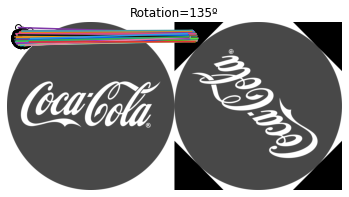

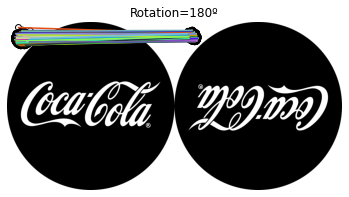

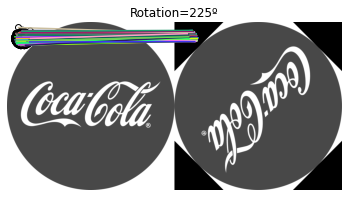

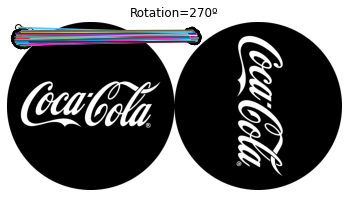

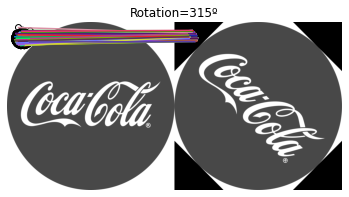

In [24]:
# solution
Rotations = (0, 45, 90, 135, 180, 225, 270, 315)
modelImage = u.loadGrayFloatImage('images/cocacola/cocacola_logo.png')
plt.imshow(modelImage, cmap='gray')
plt.axis('off')
plt.show()
for rotation in Rotations:
    otherImage = transform.rotate(modelImage, rotation)
    keypoints1, keypoints2, matches12 = get_ORB(starBucksImage, starBucks4Image)
    feature.plot_matches(plt, modelImage, otherImage, keypoints1, keypoints2, matches12)
    plt.axis('off')
    plt.title(f"Rotation={rotation}º")
    plt.show()


**Exercise #6. Analysis of the applied techniques and results**

*   What are the advantages of ORB object detection compared with HOG object detector?

**Solution**

*(Double-click or enter to edit)*

...

*   What would happen if you analyse an image that does not contain the Starbucks logo (as is the case of "edificio.jpg")?

In [13]:
# solution



*   What are the different ways of defining a quality measure for the correspondance between two images? (implementation of measures is not necessary)?

**Solution**

*(Double-click or enter to edit)*

...

# Panorama Stitching (Not graded)

Image Mosaicing is a technique of combining multiple overlapping images into a single image.

*   A simple tutorial can be found in this notebook: 
*   https://github.com/scikit-image/skimage-tutorials/blob/master/lectures/adv3_panorama-stitching.ipynb


---

## **End of P4: Corner Detection and ORB**
Deadline for P4 submission in CampusVirtual is: **Thursday, the 29th of October, 2020**
